<a href="https://colab.research.google.com/github/rifyalt/vial/blob/master/Mister_Aladin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Analisis ini dibuat hanya semata untuk menjadi bahan analisa untuk mendapatkan insight baik untuk kemajuan bersama tanpa ada maksud lain menyudutkan atau hal lainnya.

Untuk analisis saat ini saya akan bahas tentang salah satu aplikasi Online Travel Agent dibuat oleh MNC Aladin Indonesia (**Mister Aladin**)

https://id.linkedin.com/in/rifyaltumber

---

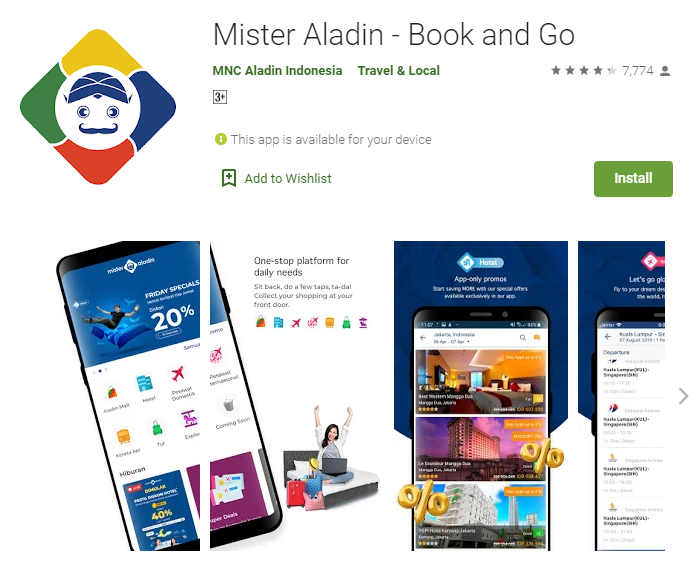

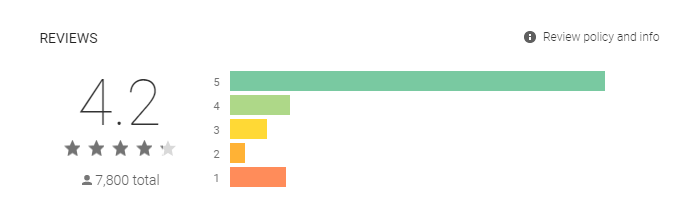

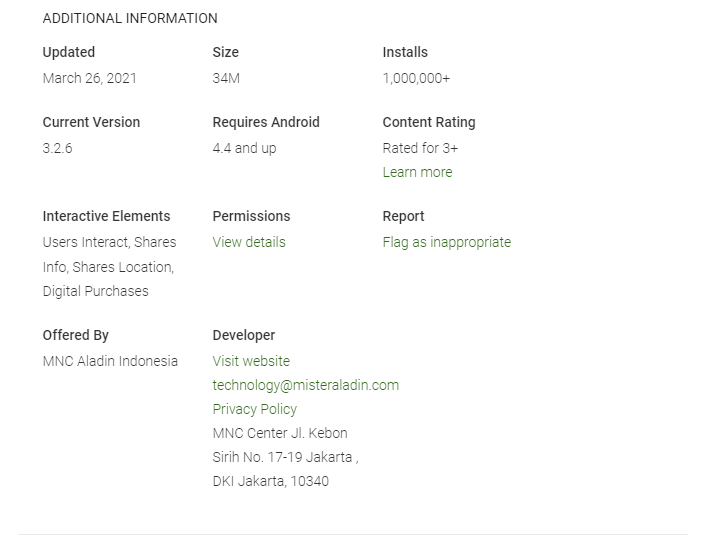

# Install pip

In [1]:
#Langkah 1 - install google play scrapper

!pip install -qq google-play-scraper

     |████████████████████████████████| 51kB 2.5MB/s 


# Import Library

In [2]:
#Langkah 2

#import library
import json
import pandas as pd
from tqdm import tqdm
import numpy as np

# import seaborn as sns
import matplotlib.pyplot as plt

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

from google_play_scraper import Sort, reviews, reviews_all, app

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# %matplotlib inline
# %config InlineBackend.figure_format='retina'

# sns.set(style='whitegrid', palette='muted', font_scale=1.2)

pd.options.mode.chained_assignment = None 
pd.options.display.max_colwidth=200


Bisa mendapatkan 2 dataset dari Google Play Scrapper Library yaitu:
- **App Information** 
- **App Review**


---

# Data Processing

In [3]:
# Langkah - 3

# id aplikasi didapat dari halaman google play store page 
# https://play.google.com/store/apps/details?id=com.misteraladin.android

ap = 'com.misteraladin.android'

In [4]:
# Langkah - 4

# Untuk mencari insight berdasarkan info dari aplikasi SPIN

app_infos = []

info = app(ap, lang='in', country='id')
del info['comments']
app_infos.append(info)

In [5]:
# Langkah - 5

# membuat data frame

app_info_df = pd.DataFrame([app_infos[0]])
app_info_df

,title,description,descriptionHTML,summary,summaryHTML,installs,minInstalls,score,ratings,reviews,histogram,price,free,currency,sale,saleTime,originalPrice,saleText,offersIAP,inAppProductPrice,size,androidVersion,androidVersionText,developer,developerId,developerEmail,developerWebsite,developerAddress,privacyPolicy,developerInternalID,genre,genreId,icon,headerImage,screenshots,video,videoImage,contentRating,contentRatingDescription,adSupported,containsAds,released,updated,version,recentChanges,recentChangesHTML,editorsChoice,appId,url
0,Mister Aladin - Book and Go,"Buat apa repot memilih dari ribuan hotel yang ada untuk booking satu hotel yang pas dengan kebutuhan dan gaya liburan? Dengan aplikasi Mister Aladin, kamu bisa menemukan beragam pilihan hotel yang...","Buat apa repot memilih dari ribuan hotel yang ada untuk booking satu hotel yang pas dengan kebutuhan dan gaya liburan? Dengan aplikasi Mister Aladin, kamu bisa menemukan beragam pilihan hotel yang...",Pesan hotel terbaik dengan layanan personal untuk semua kebutuhan travel kamu.,Pesan hotel terbaik dengan layanan personal untuk semua kebutuhan travel kamu.,1.000.000+,1000000,4.236573,7797,3389,"[817, 229, 558, 877, 5316]",0,True,USD,False,None,None,None,False,None,34M,4.4,4.4 dan yang lebih tinggi,MNC Aladin Indonesia,MNC+Aladin+Indonesia,technology@misteraladin.com,https://www.misteraladin.com,"MNC Center\nJl. Kebon Sirih No. 17-19\nJakarta , DKI Jakarta, 10340",https://www.misteraladin.com/privacy-and-policy,7438703596287776854,Perjalanan & Lokal,TRAVEL_AND_LOCAL,https://play-lh.googleusercontent.com/aWbCXGOPjuhDdjwvE_kqG9yxP_UD3ArMnC--Dvfk-En5Xd3H6Z1GxugQ0ulm1Cfcbg,https://play-lh.googleusercontent.com/SPCe4ezlDhc4ITLxp5j2AOQyLvKGk9jmjMcnziijT93TMIRGr9VM2Tg0qJhUlgND-A,"[https://play-lh.googleusercontent.com/HR4_RIp-th7AxYOC42jfX0UB3BF-ohd0UlZrwYXrwvp_ke0x0UYFfThf7GQ6ora2cX4, https://play-lh.googleusercontent.com/mdsIaW4sYqOkLhu9bclnfmipb6DE5HL8WpIqvRGazCqTbt2ZUc...",None,None,Rating 3+,None,None,False,17 Agu 2016,1616757151,3.2.6,"Si serbabisa untuk kebutuhan harian\r\nDuduk santai, pesan lewat aplikasi, selesai. Nanti diantar ke rumah!","Si serbabisa untuk kebutuhan harian<br>Duduk santai, pesan lewat aplikasi, selesai. Nanti diantar ke rumah!",False,com.misteraladin.android,https://play.google.com/store/apps/details?id=com.misteraladin.android&hl=in&gl=id


In [6]:
# Langkah - 6

# Put Histogram of Ratings in List

json_obj = json.dumps(
    app_infos[0], 
    indent=2, 
    sort_keys=True, 
    default=str
  )

a_json_object = json.loads(json_obj)
list_from_json = a_json_object["histogram"]

# Obtain based on percentage
percentage_list_histogram = []

for i in list_from_json:
  result = i/sum(list_from_json)
  result = "{:.2%}".format(result)
  percentage_list_histogram.append(result)

percentage_list_histogram

# Create a plot

import plotly.graph_objects as go # inisial

x = [1, 2, 3, 4, 5]
y = percentage_list_histogram

fig = go.Figure(data=[go.Bar(
            x=x, y=y,
            text=y,
            textposition='auto'
        )])

fig.update_layout(title_text='App Info Ratings Histogram')

fig.show()

**Kategori Nilai :**
* 91-100 = Sangat Baik
* 81-90  = Baik
* 71-80  = Sedang
* 61-70  = Rendah
* 60-Kebawah = Sangat Rendah

### Dari histogram terlihat Aplikasi *Mister Aladin*
---

*   Rating 5 = **68.18%**
*   Rating 4 = **11.25%**

Total **79.43%** (68.18% + 11.25%) 

Rating masuk kategori SEDANG!

In [7]:
# Langkah - 7

app_reviews = []

result = reviews_all(
    ap,
    sleep_milliseconds=0, # defaults to 0
    lang='in', # defaults to 'en'
    country='id', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT, can use Sort.NEWEST
    # filter_score_with=5 # defaults to None(means all score)
)

In [8]:
app_reviews.extend(result)

In [9]:
app_reviews_df = pd.DataFrame(app_reviews)

In [10]:
app_reviews_df.head(10) # contoh 10 hasil review

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOHMo-5oOBVc0NpaxzDX8I67upe46OeNBGiamoGDzwiP2IyRrjUYLy0YNK00Nsaw6aeP55niTvcqEby_tA,Lindo,https://play-lh.googleusercontent.com/a-/AOh14GiElXjUTWzbKNipnEqZnAcCavzIkMqPrCCL5OV8JQ,"Saya suka booking tiket disini, pesannya lewat email, dan lebih sukanya lagi Lion sama batik dapat bagasi 20kg..gak ada situs online maskapai nerapin bagasi gitu lion dan batik bisa dapat bagasi 2...",5,28,3.2.6,2021-04-05 13:22:14,None,NaT
1,gp:AOqpTOFPDBdUL7dhvFJDrlGNCISUs4oA0OU5jrzSthlm9ieOLoG-1GysDXmVll8lXqdGhOUnTKA4eyfHcV3Haw,MisKolik Candra,https://play-lh.googleusercontent.com/-RQCnqdErEtY/AAAAAAAAAAI/AAAAAAAAAAA/AMZuuclZOT_VpZCSSELb7M3ypgt5vDOUbg/photo.jpg,Tak guna mahal²,1,7,3.2.6,2021-04-11 14:10:44,None,NaT
2,gp:AOqpTOHbeUTiE8apKjqzRDqaqWoNT1xc7BBzSgkelgItAMheOvMwABSVoNKJXz7Q1q-_-vHNjQ9ZbZ7VDEXu7Q,tanti mia budiyana,https://play-lh.googleusercontent.com/-X4LlcsnegwE/AAAAAAAAAAI/AAAAAAAAAAA/AMZuucmDYjoivOJFJA5s1QrJME0hW5Nvfw/photo.jpg,Kecewa berat....belnja lwt spin voucher udah dpt... Tp tiap masukan ke keranjang log in trs padahal udah log in . ....rugi...uang dah masuk...meskipun mnrt kmu 100.800 murah. Tp buat gue mahal.......,1,48,3.2.3,2021-01-27 10:14:52,"Hai Kak Tanti! 🙋🏻‍♂️\nMohon maaf atas ketidaknyamanannya yaa 😞🙏🏻\nBoleh tolong diinfokan kronologi lengkap, nama dan no. telp yang terdaftar di Mister Aladin ke cs@misteraladin.com\nTerima kasih Kak!",2021-01-28 03:43:15
3,gp:AOqpTOHutCJvaJbiq5_GwPkqr7rVYVK2SrnU8hrz48Ig5j5WXfGB17_Qg9oRRF3_Zt-iLALs7bzcLSr788uMRw,Dwiky Darmawan,https://play-lh.googleusercontent.com/-baF4b7LYEiI/AAAAAAAAAAI/AAAAAAAAAAA/AMZuucnFvazqlDlU3o5tATis1GKh5wVIXg/photo.jpg,"Kecewa, nyewa apertemen, pihak ketiganya travelio, udah gitu travelionya juga ngga stand by di apartemen, udah gitu, malah ngikut kebijakan travelio, udah sangat kecewa",1,21,3.2.2,2021-02-11 12:54:24,None,NaT
4,gp:AOqpTOGs0MPs5Hr-3vDWIagHnxQzM3XcqR7BerS3MldcJrOonxM94Tgj4fDU5kS2vD8G1-L4hvWEaXdA7cqfvA,winda fransiska,https://play-lh.googleusercontent.com/a-/AOh14GiIxXtexz2ZGfxf6_-YcgySd33RUmiq8Aa0n4TsZg,"Saya bner2 ngerasa kecewa sama aplikasi ini,, saya pesan di hari ini, kenapa tgl nya malah buat di hari besok,,, seharus nya aplikasi klo kita psn di hri ini maka tgl scra otomatis di tgl hri ini....",1,74,3.1.0,2020-11-21 13:32:18,"Hai Kak Winda, sebelumnya Mister mohon maaf untuk ketidak nyamanannya 😞🙏🏻 Boleh diinfokan mengenai detailnya ke cs@misteraladin.com. Terima kasih Kak Winda, have a nice day! 🙇🏻‍♂️",2020-11-23 06:43:35
5,gp:AOqpTOEHnZ2tSMZXimyvX2gPkgEKTckiMMLLhVnmxbILu1NCstlkiDCExDtu8PKu_HpFcq7CdaLq8piM3m8q4w,nurhayati yati,https://play-lh.googleusercontent.com/a-/AOh14Gjl27a4nMpkoIH5zHL2DLT1UJZzmjXz7OXHbAOw,"Saya kecewa, marah, kesal... Saya pesan hotel hr ini, pembayarannya berhasil,, tp pihak hotel blg tdk ada kerjasama dg mister aladin. Dan tdk ada masuk ke sistem hotelnya. Cs pun tdk ada merespon.😡",1,78,3.2.2,2021-01-02 11:48:16,None,NaT
6,gp:AOqpTOFGSKaVi4w5bleS96FopHqxQCDUtkTDXt_-Mb69mxKVoUlMOvvWmohu3Tx7NwmPs0Ol_jzPxrrPWH5mbg,Faidhatun Najiah,https://play-lh.googleusercontent.com/a-/AOh14Gh6zSNyUUK8JG_cGERpX-GF2bkXDdQeA1RYyEum,"Ada permasalahan ketika pengiriman email untuk pembelian, beruntungnya admin khusus costumer sangat tanggap, jadi saya beri bintang lima. Terima kasih atas tanggapan cepatnya dear admin mister ala...",5,37,3.1.0,2020-12-04 15:33:11,None,NaT
7,gp:AOqpTOFGtcNDkTUOQb-daU4Us7CnGqrrV9Fgp0A9bo3Nj6uohnAwXLxmn_G-hE3H9fz7kQLLciW0m6yjyFaFtQ,Mike Yuliana,https://play-lh.googleusercontent.com/-bctqhsnZwvk/AAAAAAAAAAI/AAAAAAAAAAA/AMZuucklCs-Tde4hFzDC3mCvdyc03h23sw/photo.jpg,"Parah... Voucher sudah terbit, dibatalin, alasan harga dari hotel bertepatan naik, klo di*****loka gak pernah begini, jgn suka php, kita sudah siapin semua akomodasi, malah dibatalin.. Ini pihak h...",1,27,3.1.0,2020-11-28 10:20:22,None,NaT
8,gp:AOqpTOGrk2hEM3FkFCTlJICzluR1TWCeGd5Ksogavt8Zo5n9NQBgrIqaNGRKAHa5MyPV87lTbQz0c3xKt_P94Q,Zul

In [11]:
app_reviews_sum = app_reviews_df.groupby("score").count()
app_reviews_sum

,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
score,,,,,,,,,
1,375,375,375,375,375,265,375,168,168
2,92,92,92,92,92,63,92,41,41
3,170,170,170,170,170,107,170,84,84
4,215,215,215,215,215,147,215,131,131
5,1509,1509,1509,1509,1509,1061,1509,750,750


In [12]:
app_reviews_sum.sort_values(by=["score"], ascending=False)

,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
score,,,,,,,,,
5,1509,1509,1509,1509,1509,1061,1509,750,750
4,215,215,215,215,215,147,215,131,131
3,170,170,170,170,170,107,170,84,84
2,92,92,92,92,92,63,92,41,41
1,375,375,375,375,375,265,375,168,168


Dari score diatas didapat ada 1.509 user yang memberikan score 5 *****

In [14]:
app_reviews_sum['percent'] = (app_reviews_sum['reviewId'] / app_reviews_sum['reviewId'].sum())

app_reviews_sum['percent'] = app_reviews_sum['percent'].map('{:,.2%}'.format)

In [15]:
x = [1,2,3,4,5]
y = app_reviews_sum['percent']

fig = go.Figure(data=[go.Bar(
            x=x, y=y,
            text=y,
            textposition='auto',
        )])

fig.update_layout(title_text='App Reviews Histogram')

fig.show()

**Kategori Nilai :**
* 91-100 = Sangat Baik
* 81-90  = Baik
* 71-80  = Sedang
* 61-70  = Rendah
* 60-Kebawah = Sangat Rendah

### Dari histogram terlihat Aplikasi *Mister Aladin*
---
*   Rating 5 = **63.91%**
*   Rating 4 = **9.11%**

Total **73.02%** (63.91% + 9.11%) 

Rating review termasuk **SEDANG!**

# Import Stopwords

In [16]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [17]:
app_reviews_df['content'] = app_reviews_df['content'].str.lower()

In [18]:
# tokenized sentences

def identify_tokens(row):
    review = row['content']
    tokens = nltk.word_tokenize(review)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

app_reviews_df['words'] = app_reviews_df.apply(identify_tokens, axis=1)

In [19]:
# lemmatize tokenized words

from nltk.stem import WordNetLemmatizer
stemming = WordNetLemmatizer()

def stem_list(row):
    my_list = row['words']
    stemmed_list = [stemming.lemmatize(word) for word in my_list]
    return (stemmed_list)

app_reviews_df['stemmed_words'] = app_reviews_df.apply(stem_list, axis=1)

# Create Stopwords

In [28]:
# Create stopword list:
stopwords1 = stopwords.words('english')
stopwords1.extend(stopwords.words('indonesian'))

# Remove custom words according to context
stopwords1.extend(['app','ni','ny','eh','jg','tpi','yg','mister','aladin',"dgn","trus",
                   'dr','lg','tv','nih','ksh','ah','gw','smua','bata','utk','uda',"knpa",
                   'dlu','emang','ad','ku','gue','klo','nih','log','hr','dg','sm',"bsa","",
                   'sdh','deh','tgl','org','dri','ngga','klau','tdk','prose','udh','ttp',"si",
                   'pa','loh','blm','bnyk','lbh','gak','nya','ga','sj','ja','sy','dah','dpt',"hp",
                   'sya','tp','aja','gk','udah','dh','jd','sih','misteraladin','ini','ya','jgn'])

def remove_stops(row):
    my_list = row['stemmed_words']
    meaningful_words = [w for w in my_list if not w in stopwords1]
    return (meaningful_words)

app_reviews_df['stem_meaningful'] = app_reviews_df.apply(remove_stops, axis=1)

# app_reviews_bad['content_stopwords'] = app_reviews_bad['content'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in (stopwords1)]))


In [29]:
#rejoin words

def rejoin_words(row):
    my_list = row['stem_meaningful']
    joined_words = ( " ".join(my_list))
    return joined_words

app_reviews_df['processed'] = app_reviews_df.apply(rejoin_words, axis=1)


In [30]:
#check preprocessed content

app_reviews_df[['content','words','stemmed_words','processed']].head() # 5 teratas

,content,words,stemmed_words,processed
0,"saya suka booking tiket disini, pesannya lewat email, dan lebih sukanya lagi lion sama batik dapat bagasi 20kg..gak ada situs online maskapai nerapin bagasi gitu lion dan batik bisa dapat bagasi 20kg bersamaan..🥰❤️","[saya, suka, booking, tiket, disini, pesannya, lewat, email, dan, lebih, sukanya, lagi, lion, sama, batik, dapat, bagasi, ada, situs, online, maskapai, nerapin, bagasi, gitu, lion, dan, batik, bisa, dapat, bagasi]","[saya, suka, booking, tiket, disini, pesannya, lewat, email, dan, lebih, sukanya, lagi, lion, sama, batik, dapat, bagasi, ada, situs, online, maskapai, nerapin, bagasi, gitu, lion, dan, batik, bisa, dapat, bagasi]",suka booking tiket pesannya email sukanya lion batik bagasi situs online maskapai nerapin bagasi gitu lion batik bagasi
1,tak guna mahal²,"[tak, guna]","[tak, guna]",
2,kecewa berat....belnja lwt spin voucher udah dpt... tp tiap masukan ke keranjang log in trs padahal udah log in . ....rugi...uang dah masuk...meskipun mnrt kmu 100.800 murah. tp buat gue mahal....uninstal deh...bikin kapok..cukup rugi cepe aj g usah lebih...jleb bgt ni..buang buang uang g jelas ...heran .....,"[kecewa, berat, lwt, spin, voucher, udah, dpt, tp, tiap, masukan, ke, keranjang, log, in, trs, padahal, udah, log, in, uang, dah, masuk, meskipun, mnrt, kmu, murah, tp, buat, gue, mahal, deh, bikin, rugi, cepe, aj, g, usah, lebih, jleb, bgt, buang, uang, g, jelas, heran]","[kecewa, berat, lwt, spin, voucher, udah, dpt, tp, tiap, masukan, ke, keranjang, log, in, trs, padahal, udah, log, in, uang, dah, masuk, meskipun, mnrt, kmu, murah, tp, buat, gue, mahal, deh, bikin, rugi, cepe, aj, g, usah, lebih, jleb, bgt, buang, uang, g, jelas, heran]",kecewa berat lwt spin voucher masukan keranjang trs uang masuk mnrt kmu murah mahal bikin rugi cepe aj g jleb bgt buang uang g heran
3,"kecewa, nyewa apertemen, pihak ketiganya travelio, udah gitu travelionya juga ngga stand by di apartemen, udah gitu, malah ngikut kebijakan travelio, udah sangat kecewa","[kecewa, nyewa, apertemen, pihak, ketiganya, travelio, udah, gitu, travelionya, juga, ngga, stand, by, di, apartemen, udah, gitu, malah, ngikut, kebijakan, travelio, udah, sangat, kecewa]","[kecewa, nyewa, apertemen, pihak, ketiganya, travelio, udah, gitu, travelionya, juga, ngga, stand, by, di, apartemen, udah, gitu, malah, ngikut, kebijakan, travelio, udah, sangat, kecewa]",kecewa nyewa apertemen ketiganya travelio gitu travelionya stand apartemen gitu ngikut kebijakan travelio kecewa
4,"saya bner2 ngerasa kecewa sama aplikasi ini,, saya pesan di hari ini, kenapa tgl nya malah buat di hari besok,,, seharus nya aplikasi klo kita psn di hri ini maka tgl scra otomatis di tgl hri ini.. lah ini msa lngsg di tgl bsk.. ada permainan kah disini.. sumpah bner2 kcwa. ga mau2 lagi order hotel di apl ini. mending di sebelah...","[saya, ngerasa, kecewa, sama, aplikasi, ini, saya, pesan, di, hari, ini, kenapa, tgl, nya, malah, buat, di, hari, besok, seharus, nya, aplikasi, klo, kita, psn, di, hri, ini, maka, tgl, scra, otomatis, di, tgl, hri, lah, ini, msa, lngsg, di, tgl, ada, permainan, kah, sumpah, kcwa, ga, lagi, order, hotel, di, apl, ini, mending, di, sebelah]","[saya, ngerasa, kecewa, sama, aplikasi, ini, saya, pesan, di, hari, ini, kenapa, tgl, nya, malah, buat, di, hari, besok, seharus, nya, aplikasi, klo, kita, psn, di, hri, ini, maka, tgl, scra, otomatis, di, tgl, hri, lah, ini, msa, lngsg, di, tgl, ada, permainan, kah, sumpah, kcwa, ga, lagi, order, hotel, di, apl, ini, mending, di, sebelah]",ngerasa kecewa aplikasi pesan besok seharus aplikasi psn hri scra otomatis hri msa lngsg permainan kah sumpah kcwa order hotel apl mending sebelah


Let's go to the interesting part; Bad and Good Reviews analysis

In [45]:
# Sample of bad reviews
app_reviews_df.loc[app_reviews_df.score<=3,['content','score']].head(10)

,content,score
1,tak guna mahal²,1
2,kecewa berat....belnja lwt spin voucher udah dpt... tp tiap masukan ke keranjang log in trs padahal udah log in . ....rugi...uang dah masuk...meskipun mnrt kmu 100.800 murah. tp buat gue mahal....uninstal deh...bikin kapok..cukup rugi cepe aj g usah lebih...jleb bgt ni..buang buang uang g jelas ...heran .....,1
3,"kecewa, nyewa apertemen, pihak ketiganya travelio, udah gitu travelionya juga ngga stand by di apartemen, udah gitu, malah ngikut kebijakan travelio, udah sangat kecewa",1
4,"saya bner2 ngerasa kecewa sama aplikasi ini,, saya pesan di hari ini, kenapa tgl nya malah buat di hari besok,,, seharus nya aplikasi klo kita psn di hri ini maka tgl scra otomatis di tgl hri ini.. lah ini msa lngsg di tgl bsk.. ada permainan kah disini.. sumpah bner2 kcwa. ga mau2 lagi order hotel di apl ini. mending di sebelah...",1
5,"saya kecewa, marah, kesal... saya pesan hotel hr ini, pembayarannya berhasil,, tp pihak hotel blg tdk ada kerjasama dg mister aladin. dan tdk ada masuk ke sistem hotelnya. cs pun tdk ada merespon.😡",1
7,"parah... voucher sudah terbit, dibatalin, alasan harga dari hotel bertepatan naik, klo di*****loka gak pernah begini, jgn suka php, kita sudah siapin semua akomodasi, malah dibatalin.. ini pihak hotel ramada whyndham solo yg nakal atau aplikasi ini, tolong yg bnr aja",1
8,saya mau reschedule ticket kok gak ada email atau no tlp yg bisa di hubungi.?,1
9,"woy gw pesen hotel napa ga masuk sistem ke hotelny.. pembayaran dikonfirmasi,, tapi ga masuk,, customer service pada ga jawa mau lu apa",1
10,"tolong tambah opsi pembayaran dengan gopay dong. saya pelajar cukup sulit dengan pembayaran, hanya memiliki gopay",3
11,tidak ada bonus/diskon buat pengguna baru/lama,1


In [33]:
# put bad reviews in new dataframe
app_reviews_bad = app_reviews_df[app_reviews_df.score<=3]

In [34]:
text = " ".join(review for review in app_reviews_bad.processed)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 29804 words in the combination of all review.


Ada 29.804 kata dalam kombinasi dari semua ulasan tidak baik.

# Generate a word cloud image

In [35]:
pd.set_option('max_colwidth', 600)

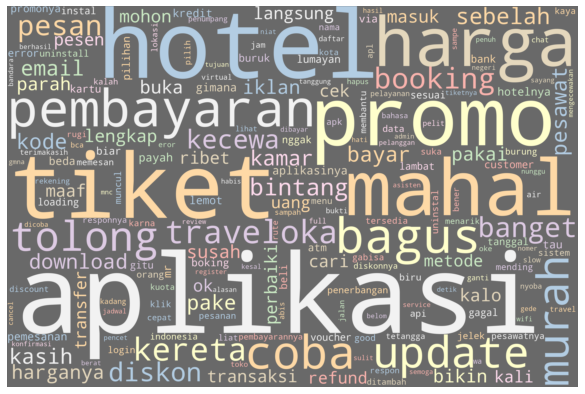

In [37]:
# Generate a word cloud image
wordcloud = WordCloud(
    background_color="dimgrey",
    colormap='Pastel1', 
    width = 3000,
    height = 2000, 
    collocations=False).generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(14,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Dapat dilihat beberapa orang berbicara tentang aplikasi, tiket, hotel dan masalah lainnya

In [38]:
app_reviews_bad.loc[(app_reviews_bad['content'].str.contains("upgrade")), ['content','score']].head(10)

,content,score
1961,upgrade gak berkualitas..tae,1


In [39]:
# Sample of good reviews
app_reviews_df.loc[app_reviews_df.score>=4,['content','score']].head(10)

,content,score
0,"saya suka booking tiket disini, pesannya lewat email, dan lebih sukanya lagi lion sama batik dapat bagasi 20kg..gak ada situs online maskapai nerapin bagasi gitu lion dan batik bisa dapat bagasi 20kg bersamaan..🥰❤️",5
6,"ada permasalahan ketika pengiriman email untuk pembelian, beruntungnya admin khusus costumer sangat tanggap, jadi saya beri bintang lima. terima kasih atas tanggapan cepatnya dear admin mister aladin.",5
12,saya udah bayar tapi evoucher nya belum juga terbit bagaimana ini mister aladin,5
15,terimakasih misteraladin diskon tiket kereta nya 20% .. walaupun saya uninstal lagi karena memory penuh.. tapi saya tetap rekomendasikan ke teman2 saya aplikasi mister aladin paling baik.. banyak diskonnya.. .. nanti saya instal lagi kalo beli tiket.. dan saya sudah bantu menyebarkan alikasi ini di medsos,5
16,"saya baru pertama melakukan transaksi pakai aplikasi. saya sudah booking tiket kereta api dan sudah saya bayar di alfamart. tetapi etiket belum juga dikirim dan hanya disuruh untuk menunggu tanpa kepastian. tolong diperbaiki sistemnya, atau kasih konsumen kejelasan. setidaknya cs harus cepat tanggap dengan komplain konsumen.",4
17,"waktu itu lagi liburan ke bandung dan coba booking hotel, setelah booking ternyata ada suatu kendala.. complaint pun terjadi, tapi pihak mister aladin dengan sabar membantu dan memberikan solusi untuk masalah saya.. kamar saya pun di alokasikan dan di upgrade gratis.. thank you so much for ur effort mister aladin.. saya benar2 mengapresiasi pelayanan kalian terhadap customer 😀",5
18,"aplikasi ini susah bagus... membuat akses booking dan memesan tiket lebih mudah, selain itu terdapat banyak diskon yang bisa dipakai, tetapi masih terdapat beberapa masalah yang ada, seperti terkadang ada kesalahan dari aplikasi seperti saat sudah membayar di alfamart tetapi ternyata di aplikasi ini dituliskan bahwa transaksi tersebut gagal, sehingga membuat uang yang sudah dibayarkan sia-sia, sehingga lebih baik diperbaiki secepatnya tentamg sistem ini.",4
25,kesekian kalinya beli tiket kereta api disini n tdk pernah kecewa. tiket lebaranpun bs dpt tiket pulang pergi. puas pokoknya 👍. cuma sayang untuk promonya skr menggunakan syarat pembayaran tertentu. padahal pertama kali berminat pake aplikasi ini krn promonya banyak n tdk ribet,5
26,"sangan memuaskan, apalagi dengan fitur my personal assistant yang sangat membantu. kalau ada kekeliruan pun langsung cepat di tanggapi oleh pihak mister aladin, top bgt deh pokoknya👍",5
30,"asisten saya baik bgt deh kalo kita nanya dia pasti jawab meskipun ada di tiket dan saya tidak paham dia pasti jawab walaupun itu hal sepele juga, terima kasih mister aladin atas pelayanan yang nyaman dan memudahkan kita apalagi fitur asisten pribadinya ❤",5


In [40]:
# put good reviews in new dataframe
app_reviews_good = app_reviews_df[app_reviews_df.score>=4]

In [41]:
text = " ".join(review for review in app_reviews_good.processed)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 31853 words in the combination of all review.


Ada 31.853 kata dalam kombinasi dari semua ulasan baik.

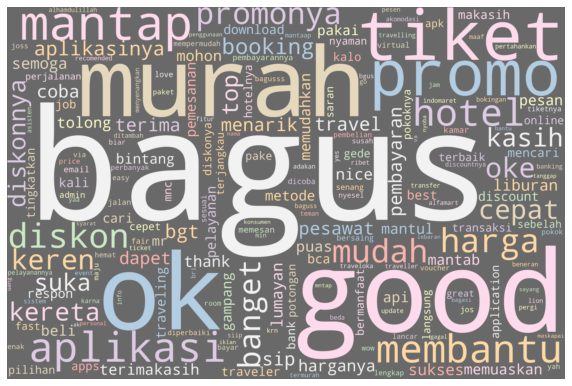

In [42]:
# Generate a word cloud image
wordcloud = WordCloud(
    background_color="dimgrey",
    colormap='Pastel1', 
    width = 3000,
    height = 2000, 
    collocations=False).generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Dapat dilihat beberapa orang berbicara tentang promo, bagus, good, ok, murah

In [43]:
app_reviews_good.loc[(app_reviews_good['content'].str.contains("bagus")), ['content','score']].head(10)

,content,score
18,"aplikasi ini susah bagus... membuat akses booking dan memesan tiket lebih mudah, selain itu terdapat banyak diskon yang bisa dipakai, tetapi masih terdapat beberapa masalah yang ada, seperti terkadang ada kesalahan dari aplikasi seperti saat sudah membayar di alfamart tetapi ternyata di aplikasi ini dituliskan bahwa transaksi tersebut gagal, sehingga membuat uang yang sudah dibayarkan sia-sia, sehingga lebih baik diperbaiki secepatnya tentamg sistem ini.",4
31,"aplikasi ini sangat bagus.... mohon mister aladin untuk promo diskon ticket kereta 200ribu tolong di adakan kembali, karena saya belum pernah nyoba, untuk lebaran nih hehe mntap caur, apakah pembayaran bisa melalui via alfamart atau indomaret ?",4
36,"mohon maaf sebelumnya🙏🙏 cuma mau kasih saran aja, klo mau tambah maju sukses menurut saya ini aplikasi mohon maaf 🙏klo bisa nama mister aladin sama iklan nya mohon diganti aja kurang bagus tdk menarik, mohon maaf sekali lg🙏🙏 cuma saran aja, semoga aplikasi ini bisa memberi manfaat utk smua orang, sukses boss👍🏼",4
66,"bagus, promo jg banyak. tapi cm metode pembayaranya yg kurang, kenapa gak ada klik bca? m bca? virtual akun bca? pasti banyak yg pake bca dsini. makasih.",5
69,"bagus apalagi promonya banyak dan dapat potongan yg lumayan, tapi tolong ditambahkan metode pembayaran seperti transfer atau atm dengan menggunakan pilihan bank lain lagi. tks",5
77,"pelayanannya bagus, pernah ada kendala saat pwmbayaran tiket tapi cs nya sangat sangat membantu dan profesional",5
150,bagus jadi enak dong kalo liburan pokoknya bagus deh yang gak download pasti nyesel pokoknya aplikasinya bagus,5
163,aplikasi sdh bagus.. mohon ditambahkan fitur utk pemesanan tiket pesawat & reservasi hotel internasional,4
164,bagus.. tpi tolong sistem pembayarannya di sediakan trasnfer via m bangking dgn rek virtual dong.. repot saya klo ke atm mulu..,5
176,sangat bagus d gunakan dan cepat tanggap kalo ad masalh tau pun keluhan pelanggan,5
